In [245]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import json

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [203]:
feture_folder = '/home/ubuntu/meme_data/VB/'
with open(feture_folder + 'train.pickle', 'rb') as f:
    temp = pickle.load(f)
    X1 = np.asarray(temp['feature_vb'])
    X2 = np.asarray(temp['txt_fea'])
    X3 = np.asarray(temp['txt_mod'])
    X4 = np.asarray(temp['txt_img_fea'])
    X5 = np.asarray(temp['img_fea'])
    X6 = np.asarray(temp['img_mod'])
    X_train = np.concatenate((X1,), axis = 1)
    label_train = np.asarray(temp['label'])

with open(feture_folder + 'dev.pickle', 'rb') as f:
    temp = pickle.load(f)
    X1 = np.asarray(temp['feature_vb'])
    X2 = np.asarray(temp['txt_fea'])
    X3 = np.asarray(temp['txt_mod'])
    X4 = np.asarray(temp['txt_img_fea'])
    X5 = np.asarray(temp['img_fea'])
    X6 = np.asarray(temp['img_mod'])
    X_dev = np.concatenate((X1,), axis = 1)
    Id_dev = np.asarray(temp['id'])
    label_dev = np.asarray(temp['label'])

num_classes = len(np.unique(label_train))

In [197]:
N_feature = X_train.shape[1]

model = Sequential([
    layers.Dropout(0.1, input_shape = (N_feature, )),
    layers.BatchNormalization(),
    layers.Dense(32, activation= 'sigmoid'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(16, activation= 'sigmoid'),
    layers.Dense(1, activation= 'sigmoid')
])

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', tf.keras.metrics.AUC()])

model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_103 (Dropout)        (None, 768)               0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 768)               3072      
_________________________________________________________________
dense_149 (Dense)            (None, 32)                24608     
_________________________________________________________________
batch_normalization_46 (Batc (None, 32)                128       
_________________________________________________________________
dropout_104 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_150 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_151 (Dense)            (None, 1)               

In [258]:
epochs = 4
history = model.fit(X_train, label_train,
                    validation_data = (X_dev,label_dev),
                    epochs=epochs, 
                    batch_size = 1000, 
)

Epoch 1/4
9/9 [==============================] - 0s 11ms/step - loss: 0.1662 - accuracy: 0.9885 - auc_41: 0.9979 - val_loss: 0.7162 - val_accuracy: 0.6440 - val_auc_41: 0.7322
Epoch 2/4
9/9 [==============================] - 0s 7ms/step - loss: 0.1500 - accuracy: 0.9889 - auc_41: 0.9976 - val_loss: 0.7381 - val_accuracy: 0.6440 - val_auc_41: 0.7262
Epoch 3/4
9/9 [==============================] - 0s 7ms/step - loss: 0.1373 - accuracy: 0.9889 - auc_41: 0.9985 - val_loss: 0.7601 - val_accuracy: 0.6420 - val_auc_41: 0.7248
Epoch 4/4
9/9 [==============================] - 0s 7ms/step - loss: 0.1270 - accuracy: 0.9893 - auc_41: 0.9981 - val_loss: 0.7825 - val_accuracy: 0.6440 - val_auc_41: 0.7274


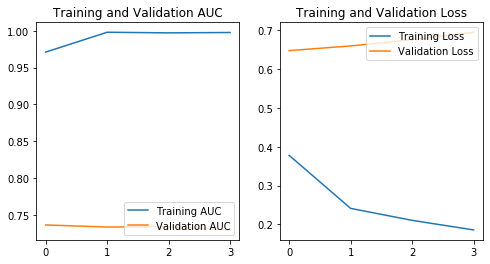

In [199]:
acc = history.history[list(history.history.keys())[2]]
val_acc = history.history[list(history.history.keys())[-1]]

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC')
plt.plot(epochs_range, val_acc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Validation AUC ROC with image: 0.732256


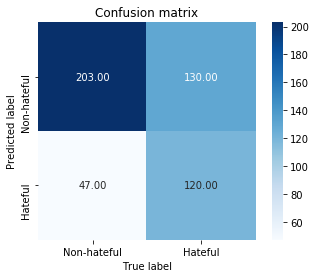

In [200]:
prob = model.predict(X_dev)
print('Validation AUC ROC with image:', roc_auc_score(label_dev, prob, multi_class='ovo'))

confusion = confusion_matrix(
label_dev, np.round(prob, 0))

axis_labels = ['Non-hateful', 'Hateful']
ax = sns.heatmap(
    confusion.T, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.title("Confusion matrix")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

True Negetive


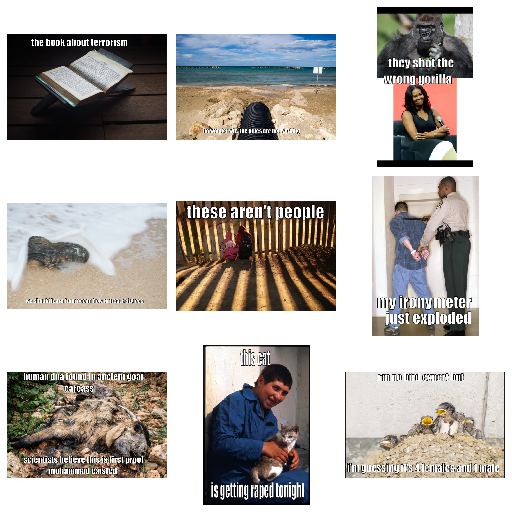

In [257]:
print("True Negetive")
fig = plt.figure(figsize=(7, 7), constrained_layout=True)
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

err = np.abs(label_dev - prob[:, 0])
Id_err = err.argsort()[::-1]
for ID, i in zip(Id_err[label_dev[Id_err] == 1][:9], range(9)):
    fig.add_subplot(grid[i//3, i%3])
    img = str(Id_dev[ID])
    img = '0' * (5 - len(img)) + img
    img = mpimg.imread('/home/ubuntu/meme_data/data/img/' + img + '.png')
    plt.imshow(img)
    plt.axis('Off')

False Positive


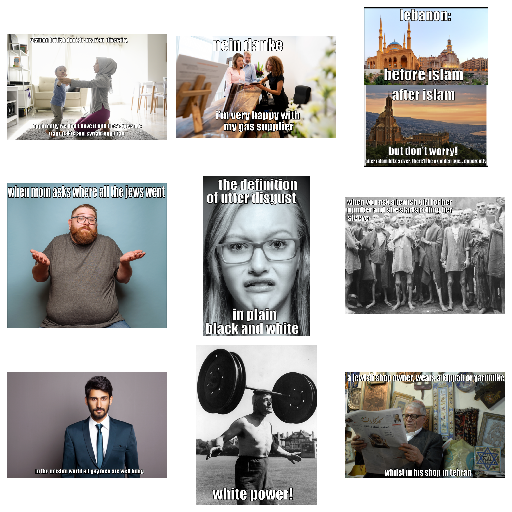

In [256]:
print("False Positive")
fig = plt.figure(figsize=(7, 7), constrained_layout=True)
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

err = np.abs(label_dev - prob[:, 0])
Id_err = err.argsort()[::-1]
for ID, i in zip(Id_err[label_dev[Id_err] == 0][:9], range(9)):
    fig.add_subplot(grid[i//3, i%3])
    img = str(Id_dev[ID])
    img = '0' * (5 - len(img)) + img
    img = mpimg.imread('/home/ubuntu/meme_data/data/img/' + img + '.png')
    plt.imshow(img)
    plt.axis('Off')